#### Introduction

#### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

##### Load data

In [3]:
data = pd.read_csv("qsar_aquatic_toxicity.csv",sep=";")
data

,0,0.1,0.2,2.419,1.225,0.667,0.3,0.4,3.740
0,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
1,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
2,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
3,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
4,215.34,327.629,3,0.189,4.677,1.333,0,4,6.064
...,...,...,...,...,...,...,...,...,...
540,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
541,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
542,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
543,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


In [4]:
# Need to have header
data = pd.read_csv("qsar_aquatic_toxicity.csv",sep=";", names=['TPSA', 'SAacc', 'H-050', 'MLOGP', 'RDCHI', 'GATS1p', 'nN', 'C-040',
                          'quantitative response'])
data                         

,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


#### Data information and characteristics

In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TPSA                   546 non-null    float64
 1   SAacc                  546 non-null    float64
 2   H-050                  546 non-null    int64  
 3   MLOGP                  546 non-null    float64
 4   RDCHI                  546 non-null    float64
 5   GATS1p                 546 non-null    float64
 6   nN                     546 non-null    int64  
 7   C-040                  546 non-null    int64  
 8   quantitative response  546 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 38.5 KB


,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421
std,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500
50%,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000
75%,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000


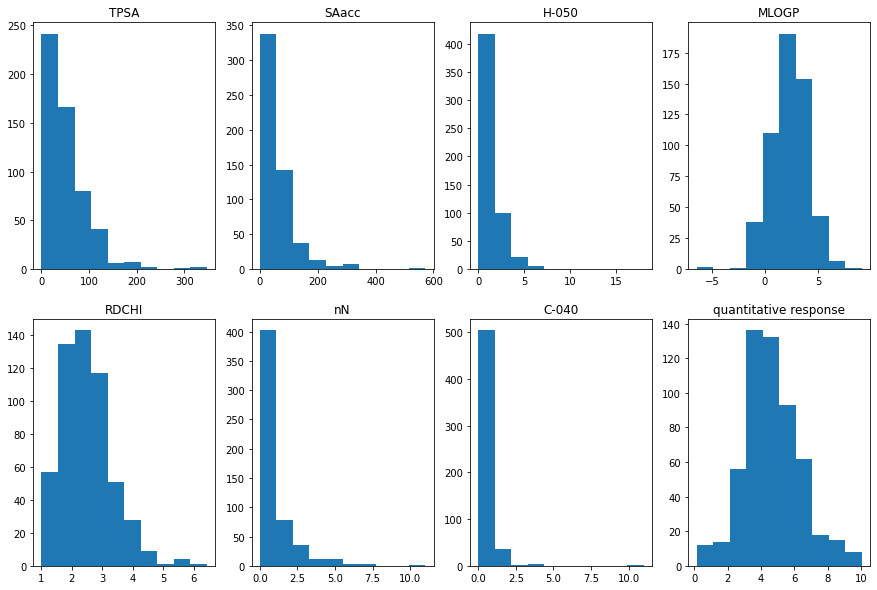

In [7]:
#Histogram Visualization
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
axs[0,0].hist(data['TPSA'])
axs[0,0].set_title('TPSA')

axs[0,1].hist(data['SAacc'])
axs[0,1].set_title('SAacc')

axs[0,2].hist(data['H-050'])
axs[0,2].set_title('H-050')

axs[0,3].hist(data['MLOGP'])
axs[0,3].set_title('MLOGP')

axs[1,0].hist(data['RDCHI'])
axs[1,0].set_title('RDCHI')

axs[1,1].hist(data['nN'])
axs[1,1].set_title('nN')

axs[1,2].hist(data['C-040'])
axs[1,2].set_title('C-040')

axs[1,3].hist(data['quantitative response'])
axs[1,3].set_title('quantitative response')

plt.show()

In [24]:
#### Define a function to get the columns that do not have any missing values

def get_cols_with_no_nans(df,col_type):
    """
    Arguments :
    df : The dataframe to process
    col_type:
        num : to only get numerical columns with no nans
        no_num : to only get non-numerical columns with no nans
        all : to get any columns with no nans
     """ 
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude = ['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include = ['object'])
    elif (col_type == 'all'):
        predictors = df
    else:
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [25]:
# Get the columns that do not have any missing values

num_cols = get_cols_with_no_nans(data, 'num')
cat_cols = get_cols_with_no_nans(data, 'no_num')

In [27]:
# How many column we got?

print("Number of numerical columns with no nan values : ", len(num_cols))
print("Number of non-numberical columns with no nan values :", len(cat_cols))

Number of numerical columns with no nan values :  9
Number of non-numberical columns with no nan values : 0


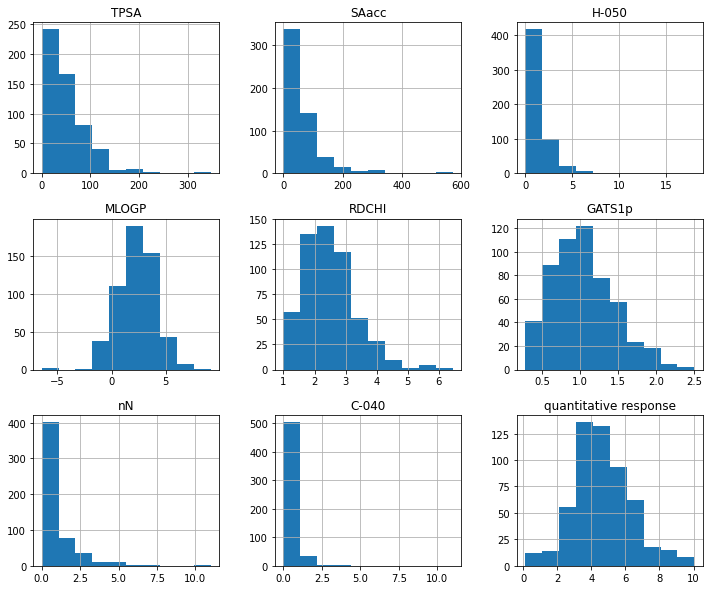

In [29]:
data = data[num_cols + cat_cols]
data.hist(figsize = (12,10))
plt.show()

In [31]:
# Split data : 70% of data for training and 30 % of data for data testing

x_train, x_test , y_train, y_test = train_test_split(data.drop(axis=0, columns='quantitative response'),
                                    data['quantitative response'], test_size=0.3)

print("Train: ",len(x_train))
print("Test :", len(x_test))

Train:  382
Test : 164


#### Train and test the models

In [33]:
lnr = LinearRegression()
mlp = MLPRegressor()

lnr.fit(x_train, y_train)
mlp.fit(x_train, y_train)

hasil_lnr = lnr.predict(x_test)
hasil_mlp = mlp.predict(x_test)

print("Mean Squared Error Linear Regression :", mean_squared_error(y_test, hasil_lnr))
print("Mean Squared Error Multilayer Perceptron :",mean_squared_error(y_test, hasil_mlp))

Mean Squared Error Linear Regression : 1.3556466532927454
Mean Squared Error Multilayer Perceptron : 1.4007845896230802


c:\Users\user\anaconda3\envs\atrophine_tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


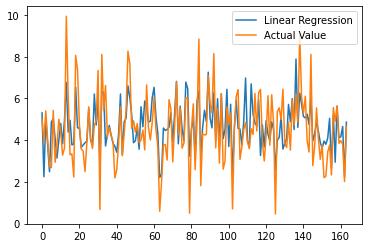

In [34]:
plt.plot(list(hasil_lnr), label ='Linear Regression')
plt.plot(list(y_test), label = 'Actual Value')

plt.legend(loc='upper right')

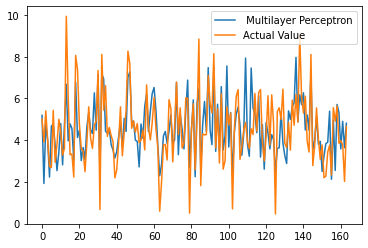

In [35]:
plt.plot(list(hasil_mlp), label = " Multilayer Perceptron")
plt.plot(list(y_test), label = 'Actual Value')
plt.legend(loc='upper right')

### Tensorflow

In [40]:
# Import library
from tensorflow.keras import Sequential, layers, optimizers

#### Model
Consists of : 8 nodes in the input layer 8 nodes in hidden layers 1 and 2 along with the activation function used is ReLU also 1 node in the output because this case is regression

In [43]:
def Simple_NN():
    model = Sequential([
    layers.Dense(8, activation = 'relu', input_shape =[8]),
    layers.Dense(8, activation = 'relu'),
    layers.Dense(1)
    ])

    optimizer = optimizers.RMSprop(0.001)
    model.compile(loss='mse', optimizer= optimizer, metrics = ['mae','mse'])
    return model
    

In [44]:
model = Simple_NN()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


#### Training Model

In [45]:
model.fit(x_train, y_train, epochs = 100, validation_split=0.2, verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 14ms/step - loss: 693.4864 - mae: 20.1066 - mse: 693.4864 - val_loss: 1070.5073 - val_mae: 23.4558 - val_mse: 1070.5073
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 508.5451 - mae: 17.3526 - mse: 508.5451 - val_loss: 813.0262 - val_mae: 20.6552 - val_mse: 813.0262
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 392.8101 - mae: 15.3787 - mse: 392.8101 - val_loss: 635.0123 - val_mae: 18.3582 - val_mse: 635.0123
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 300.5343 - mae: 13.5091 - mse: 300.5343 - val_loss: 472.9931 - val_mae: 15.9732 - val_mse: 472.9931
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 212.3591 - mae: 11.5730 - mse: 212.3591 - val_loss: 299.0410 - val_mae: 13.1149 - val_mse: 299.0410
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 132.7913 - mae: 9.4577 - mse: 132.7913 - val_loss: 163.7085

#### Testing model to predict the x_test

In [46]:
hasil_tf = model.predict(x_test)

hasil_tf.ravel()

6/6 [==============================] - 0s 798us/step


array([5.2441654, 2.1831279, 5.0192285, 3.4340837, 2.2924776, 4.86824  ,
       4.7390194, 3.8198152, 2.9648862, 3.6753929, 5.2117443, 3.1801414,
       4.465021 , 6.3005652, 3.955384 , 4.9652443, 4.3876824, 3.859581 ,
       6.5102158, 4.041981 , 4.3950844, 3.636617 , 3.971733 , 3.2669592,
       3.8255339, 5.6484437, 4.0631747, 4.4933667, 5.7851405, 4.489016 ,
       6.97667  , 2.6477757, 6.38745  , 6.8120756, 4.383706 , 4.0384297,
       4.35738  , 3.6227922, 3.4976025, 4.1857615, 3.730863 , 3.9160433,
       3.2412333, 3.5585613, 5.031516 , 4.367484 , 7.130059 , 7.1103296,
       4.7685337, 3.8189478, 3.3344378, 4.750629 , 2.8179765, 4.1544914,
       4.268527 , 5.037874 , 5.8676434, 4.6000767, 5.4714904, 6.7797203,
       7.9079165, 5.4843655, 3.9420962, 2.1676252, 2.9227042, 4.1029873,
       4.1782618, 4.167247 , 4.396079 , 5.254546 , 3.8839464, 2.9166088,
       6.8672495, 3.2370737, 4.6465216, 4.883839 , 4.1594305, 3.272376 ,
       6.801303 , 3.1994755, 4.2203054, 6.505184 , 

#### Evaluate the model using mean squared error

In [47]:
mean_squared_error(y_test, hasil_tf)

1.5467523466684252

#### Data result visulization with line chart


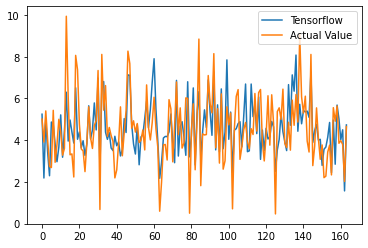

In [48]:
plt.plot(list(hasil_tf), label= "Tensorflow")
plt.plot(list(y_test), label = 'Actual Value')

plt.legend(loc='upper right')

In [49]:
len(data)

546